# UNet

In [29]:
!pip install fastai==1.0.61

In [30]:
import pandas as pd
import numpy as np
from fastai.imports import *
from fastai import *
from fastai.vision import *
#from torchvision.models import *

In [31]:
path = '../input/car-and-truck/datasets/Datasets'

Removing images that can't be opened

In [33]:
def data_frame(data_dir):
    a=[]
    for i in os.listdir(data_dir):
        for k,j in enumerate(os.listdir(data_dir+'/'+i)):
            a.append((f'{i}/{j}',i))
    return pd.DataFrame(a,columns=['filename','class'])

In [34]:
os.listdir(path)

['truck', 'car']

In [35]:
df = data_frame(path)
print(df.shape)
df.head() 

(789, 2)


,filename,class
0,truck/7621716.jpg,truck
1,truck/954468631.jpg,truck
2,truck/496912619.jpg,truck
3,truck/382249922.jpg,truck
4,truck/111712537.jpg,truck


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        df['filename'], df['class'],stratify=df['class'], test_size=0.1)

In [37]:
train = pd.DataFrame(zip(X_train.values, y_train.values), columns=['filename', 'class'], index=None)
test = pd.DataFrame(zip(X_test.values, y_test.values), columns=['filename', 'class'], index=None)
test['filename'] = path + test['filename']

In [49]:
data = ImageDataBunch.from_df(path, train, 
                                  valid_pct=0.2, bs = 8,
                                  size=64).normalize(imagenet_stats)

In [50]:
data

ImageDataBunch;

Train: LabelList (568 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
truck,truck,truck,truck,truck
Path: ../input/car-and-truck/datasets/Datasets;

Valid: LabelList (142 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
car,car,truck,truck,truck
Path: ../input/car-and-truck/datasets/Datasets;

Test: None

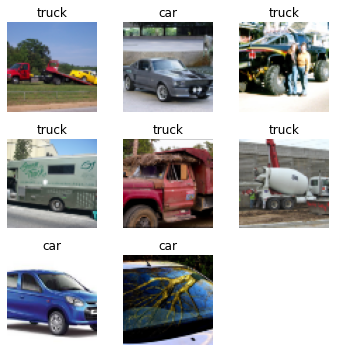

In [51]:
data.show_batch(rows=3, figsize=(5,5))

In [52]:
import torch
torch.cuda.empty_cache()

In [ ]:
# Create U-Net with a pretrained DenseNet-161 as encoder
learn_unet = unet_learner(data, models.resnet50, metrics=accuracy)

In [ ]:
learn_unet.fit(epochs = 5)

In [ ]:
test['unet'] = test['filename'].apply(lambda x: predict_car_or_truck(learn_unet, x))
test['unet'] = test['unet'].astype('str')
test.head()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy: ", accuracy_score(test['class'], test['unet']))

In [ ]:
confusion_matrix(test['class'], test['unet'])